<a href="https://colab.research.google.com/github/Betsy194/Deep-Learning/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir = '.', untar = True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)

data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/daisy/4286053334_a75541f20b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/506018088_4f7a15a7c5_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2889325612_f2fc403ff0_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2561352120_7961d8263f.jpg'),
 PosixPath('datasets/flower_photos/daisy/6207492986_0ff91f3296.jpg'),
 PosixPath('datasets/flower_photos/daisy/20182559506_40a112f762.jpg'),
 PosixPath('datasets/flower_photos/daisy/14333681205_a07c9f1752_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4278442064_a5a598524b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4993492878_11fd4f5d12.jpg'),
 PosixPath('datasets/flower_photos/daisy/2488902131_3417698611_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5794835_d15905c7c8_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5973488341_50bdf6cee3_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/13977181862_f8237b6b52.jpg'),
 PosixPath('datasets/flower_photos/daisy/4144275653_7c02d47d9b.jpg'),
 Posi

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/17305246720_1866d6303b.jpg'),
 PosixPath('datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/roses/3971662839_5cb2963b20_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9216323421_f737c1d50e.jpg')]

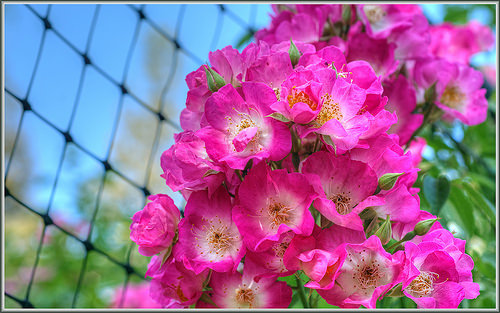

In [ ]:
PIL.Image.open(str(roses[0]))

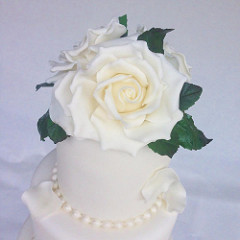

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/8729501081_b993185542_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/14270573963_f122c40438.jpg'),
 PosixPath('datasets/flower_photos/tulips/17282288501_e8738c9cfb_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/480228053_513791d474.jpg'),
 PosixPath('datasets/flower_photos/tulips/13911047024_8966d70560_n.jpg')]

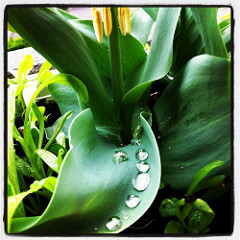

In [ ]:
PIL.Image.open(str(tulips[0]))

In [ ]:
daisy = list(data_dir.glob('daisy/*.jpg'))
daisy[:5]

[PosixPath('datasets/flower_photos/daisy/4286053334_a75541f20b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/506018088_4f7a15a7c5_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2889325612_f2fc403ff0_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2561352120_7961d8263f.jpg'),
 PosixPath('datasets/flower_photos/daisy/6207492986_0ff91f3296.jpg')]

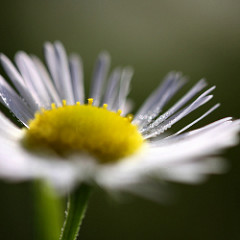

In [ ]:
PIL.Image.open(str(daisy[0]))

In [ ]:
flowers_Images_dict = {
    'roses': list(data_dir.glob('roses/*.jpg')),
    'daisy': list(data_dir.glob('daisy/*.jpg')),
    'dandelion': list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers': list(data_dir.glob('sunflowers/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg'))
}

In [ ]:
flowers_Images_dict['roses']

[PosixPath('datasets/flower_photos/roses/17305246720_1866d6303b.jpg'),
 PosixPath('datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/roses/3971662839_5cb2963b20_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9216323421_f737c1d50e.jpg'),
 PosixPath('datasets/flower_photos/roses/22506717337_0fd63e53e9.jpg'),
 PosixPath('datasets/flower_photos/roses/16152205512_9d6cb80fb6.jpg'),
 PosixPath('datasets/flower_photos/roses/2414954629_3708a1a04d.jpg'),
 PosixPath('datasets/flower_photos/roses/6936225976_a91b60d8c2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3103591125_99107c8bbe_n.jpg'),
 PosixPath('datasets/flower_photos/roses/19566556880_476c66c5ee_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15274443248_76b9f3eb24.jpg'),
 PosixPath('datasets/flower_photos/roses/6163179241_f093f45d95_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2471103806_87ba53d997_n.jpg'),


In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
str(flowers_Images_dict['roses'][0])

'datasets/flower_photos/roses/17305246720_1866d6303b.jpg'

array([[[ 81,  84,  82],
        [ 55,  79,  55],
        [ 65,  64,  43],
        ...,
        [ 52,  60,  50],
        [ 66,  75,  65],
        [ 48,  59,  49]],

       [[ 57,  60,  64],
        [112, 131, 114],
        [173, 167, 148],
        ...,
        [149, 154, 145],
        [133, 142, 132],
        [ 58,  69,  59]],

       [[ 56,  53,  49],
        [121, 135, 117],
        [187, 180, 171],
        ...,
        [198, 203, 194],
        [161, 169, 159],
        [ 55,  64,  54]],

       ...,

       [[ 60,  78,  65],
        [113, 131, 118],
        [170, 184, 172],
        ...,
        [185, 187, 181],
        [158, 164, 153],
        [ 59,  69,  57]],

       [[ 73,  64,  61],
        [109, 106,  98],
        [137, 141, 129],
        ...,
        [127, 130, 121],
        [123, 129, 118],
        [ 45,  55,  43]],

       [[ 78,  86,  75],
        [ 67,  75,  64],
        [ 59,  67,  56],
        ...,
        [ 53,  61,  50],
        [ 60,  68,  57],
        [ 74,  82,  71]]], dtype=uint8)
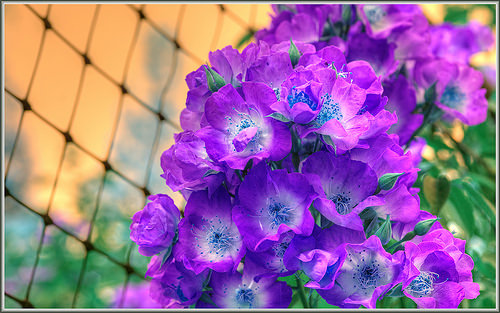

In [ ]:
#cv2 helps read the image file path and converts it into 3 dimensional array
img = cv2.imread(str(flowers_Images_dict['roses'][0]))
img

In [ ]:
img.shape

(313, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, Y = [], []

for flower_name, images in flowers_Images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
X, y = [], []

for flower_name, images in flowers_Images_dict.items():
 for image in images:
  img = cv2.imread(str(image))
  resized_img = cv2.resize(img,(180, 180))
  X.append(resized_img)
  y.append(flowers_labels_dict[flower_name])

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
len(X_train)

2752

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
     layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
     layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [35]:
model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9996 - loss: 0.0024
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9994 - loss: 0.0035
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 1.0000 - loss: 0.0010
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9998 - loss: 0.0013
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9991 - loss: 0.0071
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9999 - loss: 0.0012
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 1.0000 - loss: 7.8208e-04
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9993 - loss: 0.0063
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9986 - loss: 0.0060
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9980 - loss: 0.0058


In [36]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 365ms/step - accuracy: 0.6269 - loss: 2.3565


[2.3654229640960693, 0.6514161229133606]

In [37]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step


array([[  5.686798  ,   4.0658035 ,  -0.22589187, -10.418129  ,
          4.28735   ],
       [  7.764749  ,  -0.28405875,  -8.761992  , -12.056754  ,
         11.356385  ],
       [  2.3208013 ,   3.1071117 ,  17.054607  , -14.505517  ,
         -0.72520787],
       ...,
       [ -9.213775  , -14.694879  ,  12.428698  ,  23.26859   ,
         -0.27950892],
       [  5.7040997 ,   4.092703  ,  15.054273  , -23.46558   ,
         -7.222634  ],
       [-17.306131  ,  -9.209615  ,  12.802571  ,   8.078451  ,
          3.1602087 ]], dtype=float32)

In [38]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.9101810e-01, 1.3661565e-01, 1.8691352e-03, 7.0017805e-08,
       1.7049707e-01], dtype=float32)>

In [39]:
np.argmax(score)

0

In [40]:
y_test[0]

1

### Improve Test Accuracy Using Data Augmentation

In [41]:
data_augmentation = keras.Sequential([
    #layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))